In [160]:
# Native libraries
import os
import math
#Essential Libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn

path = "/Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie"
os.chdir(path)
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


In [155]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

df = pd.read_csv('./data/metro_CA_2011_2018_lagged_new.csv', index_col = 0)
df.head()

df1 = pd.concat([df['zipcode'], df['rent_in_1y'], df.iloc[:, 6:]], axis = 1)
df1 = df1.dropna()

In [141]:
df1.isnull().any().sum()

0

In [156]:
ts0 = df1[['zipcode', 'year', 'avg_rent']]
ts = ts0.pivot(index = "year", columns = "zipcode", values = "avg_rent")
ts_nomiss = ts.dropna(axis = 1)
ts_nomiss.isnull().any().sum()

0

<AxesSubplot:xlabel='year', ylabel='avg_rent'>

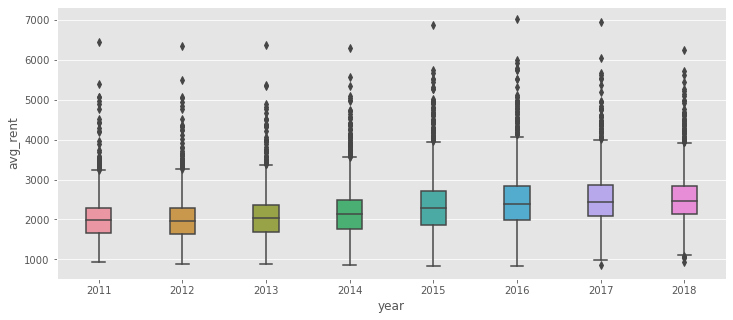

In [163]:
fig,ax = plt.subplots(figsize = (12,5))
seaborn.boxplot(ts0.year, ts0.avg_rent, ax = ax, width = 0.3)

In [159]:
ts0.head()

,zipcode,year,avg_rent
1,90292,2011,3517.166667
2,90723,2011,1856.916667
3,91207,2011,2216.083333
4,92084,2011,1889.833333
5,94560,2011,2109.583333


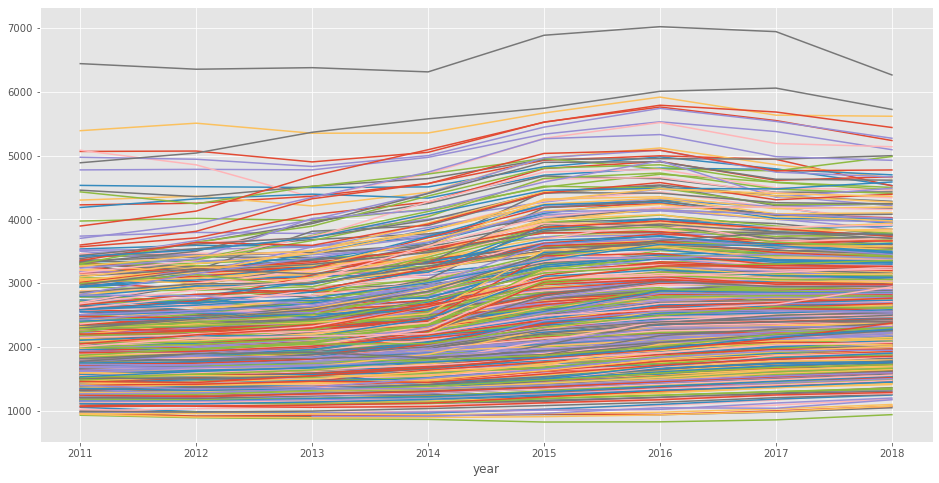

In [157]:
ts[90001].plot(figsize = (16,8))
ts[90002].plot(figsize = (16,8))

# check the time series of each zipcode: 
for i in range(ts.shape[1]):
    ts.iloc[:,i].plot(figsize = (16,8))

In [147]:
#Import libraries for algorithms
import tslearn
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

array([[0.4022, 0.4577, 0.4431, ..., 0.3485, 0.3963, 0.4276],
       [0.4056, 0.4559, 0.437 , ..., 0.4343, 0.4489, 0.4236],
       [0.4108, 0.4548, 0.4317, ..., 0.4165, 0.4413, 0.4313],
       ...,
       [0.4224, 0.4418, 0.4244, ..., 0.6453, 0.4396, 0.4488],
       [0.4187, 0.4444, 0.4232, ..., 0.5588, 0.3937, 0.462 ],
       [0.4163, 0.4518, 0.4355, ..., 0.5285, 0.4033, 0.4696]])

In [135]:
ts.isnull().any().sum()

10

In [149]:
import time
# I start with choosing k = square root of the number of series in the training dataset in kNN
#cluster_count = math.ceil(math.sqrt(ts.shape[1]))
start = time.time()
cluster_count = 3
km = TimeSeriesKMeans(n_clusters = cluster_count,metric = "dtw")
labels = km.fit_predict(ts)
print(time.time() - start)

2.9254372119903564


In [150]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0])

KeyError: 0

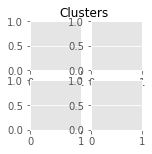

In [92]:
plot_count = 2

fig, axs = plt.subplots(plot_count, plot_count, figsize = (2,2))
fig.suptitle('Clusters')
row_i = 0
column_j = 0
for label in set(labels): 
    cluster = []
    for i in range(len(labels)):
        if(labels[i] == label):
            axs[row_i, column_j].plot(ts[i])

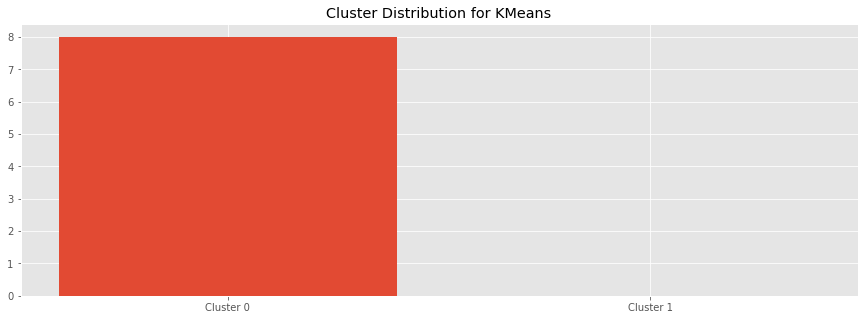

In [93]:
cluster_c = [len(labels[labels == i]) for i in range(cluster_count)] 
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize = (15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n, cluster_c)
plt.show()